# Daily Foreign Exchange Rates

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing training dataset
dataset_train=pd.read_csv('daily-foreign-exchange-rates-31-.csv')
training_set=dataset_train.iloc[:,1:].values

In [3]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set=sc.fit_transform(training_set)

In [4]:
#creating data structure with 60 timesteps and 1 output
x_train=[]
y_train=[]
for i in range(60,4773):
    x_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

#reshape
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [5]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
#Initialising RNN
regressor=Sequential()

In [13]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [14]:
#Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
#Adding the Third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [16]:
#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [18]:
#adding output layer
regressor.add(Dense(units=1))

In [19]:
#compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
148/148 [==============================] - 171s 686ms/step - loss: 0.0068
Epoch 2/100
148/148 [==============================] - 81s 544ms/step - loss: 0.0019
Epoch 3/100
148/148 [==============================] - 82s 555ms/step - loss: 0.0016
Epoch 4/100
148/148 [==============================] - 111s 751ms/step - loss: 0.0014
Epoch 5/100
148/148 [==============================] - 113s 763ms/step - loss: 0.0013
Epoch 6/100
148/148 [==============================] - 118s 800ms/step - loss: 0.0012
Epoch 7/100
148/148 [==============================] - 101s 681ms/step - loss: 0.0012
Epoch 8/100
148/148 [==============================] - 60s 408ms/step - loss: 0.0012
Epoch 9/100
148/148 [==============================] - 61s 414ms/step - loss: 0.0010
Epoch 10/100
148/148 [==============================] - 74s 500ms/step - loss: 0.0010
Epoch 11/100
148/148 [==============================] - 71s 480ms/step - loss: 9.4794e-04
Epoch 12/100
148/148 [==============================] 

In [21]:
#importing training dataset
dataset_test=pd.read_csv('test.csv')
testing_set=dataset_test.iloc[:,1:].values

In [42]:
#getting predicted of 1980 Daily foreign exchange rates
inputs=testing_set.reshape(-1,1)
inputs=sc.fit_transform(inputs)
x_test=[]
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_rate=regressor.predict(x_test)
predicted_rate=sc.inverse_transform(predicted_rate)

6/6 [==============================] - 1s 78ms/step


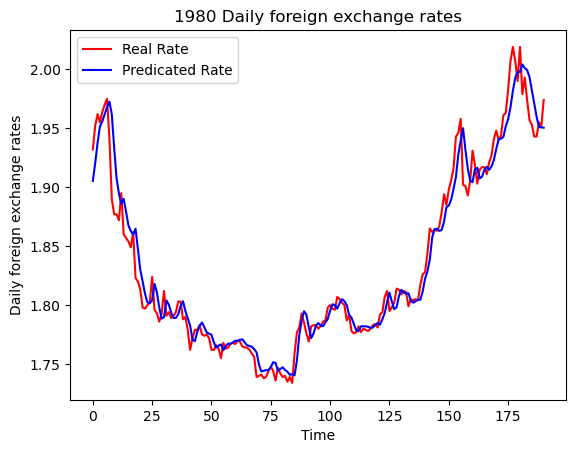

In [44]:
#visualising the result
plt.plot(testing_set[60:],color='red',label='Real Rate')
plt.plot(predicted_rate,color='blue',label='Predicated Rate')
plt.title('1980 Daily foreign exchange rates')
plt.xlabel('Time')
plt.ylabel('Daily foreign exchange rates')
plt.legend()
plt.show()